In [ ]:
!pip install simpy

# Images

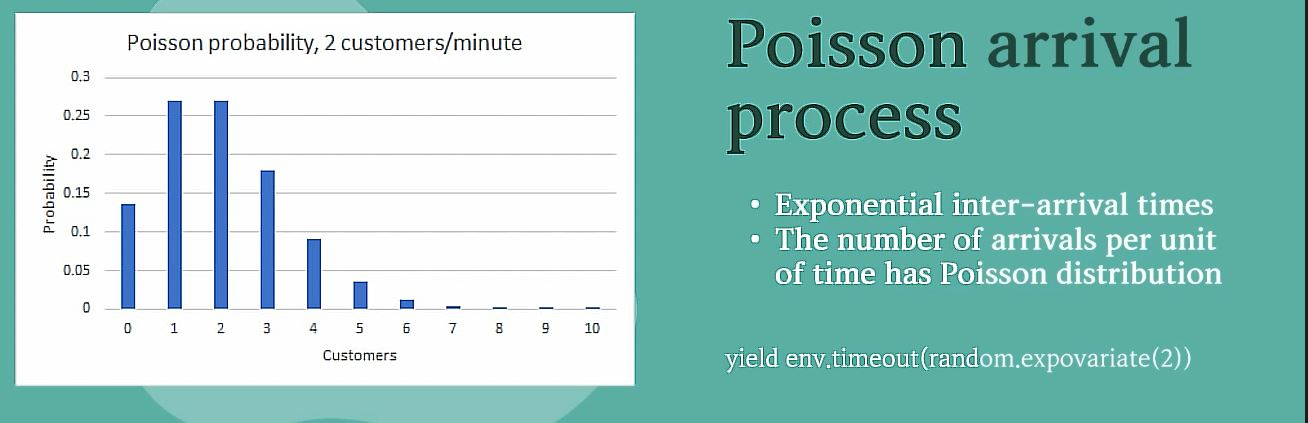

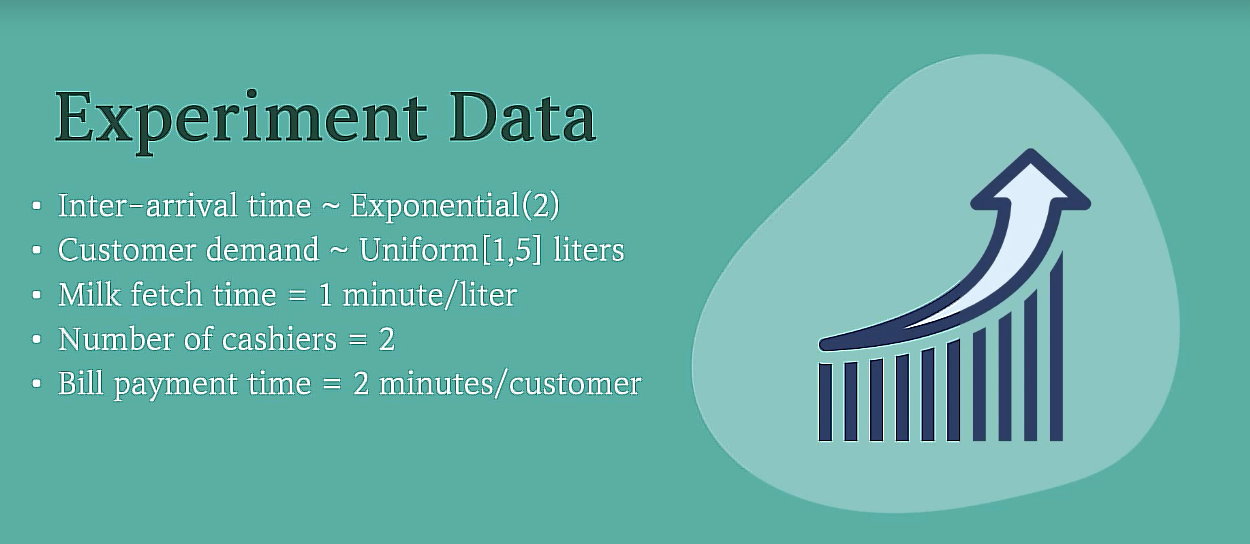

# Init

In [ ]:
import simpy, random

MINS_PER_LITER = 1

def customer(env, cashiers, name):
  milk_required = random.randint(1, 5)
  print(f'{name}: Arrives at time {env.now :.2f} and requires {milk_required}L milk.')
  yield env.timeout(milk_required * MINS_PER_LITER)
  print(f'{name}: Finish milk retrieval at {env.now :.2f}')
  with cashiers.request() as req:
    yield req
    print(f'{name}: Gets a cashier at time {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: Leaves at {env.now :.2f}')

def cust_gen(env, cashiers):
  id = 1
  while True:
    random_inter_arr_time = random.expovariate(2)
    yield env.timeout(random_inter_arr_time)
    env.process(customer(env=env, name=f'cust {id}', cashiers=cashiers))
    id += 1

random.seed(2)

env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)
env.process(cust_gen(env=env, cashiers=cashiers))
env.run(until=10) #10 mins

cust 1: Arrives at time 1.56 and requires 1L milk.
cust 1: Finish milk retrieval at 2.56
cust 1: Gets a cashier at time 2.56.
cust 2: Arrives at time 3.04 and requires 3L milk.
cust 3: Arrives at time 3.09 and requires 3L milk.
cust 4: Arrives at time 3.99 and requires 2L milk.
cust 5: Arrives at time 4.13 and requires 5L milk.
cust 1: Leaves at 4.56
cust 6: Arrives at time 4.60 and requires 4L milk.
cust 7: Arrives at time 5.17 and requires 5L milk.
cust 8: Arrives at time 5.68 and requires 5L milk.
cust 4: Finish milk retrieval at 5.99
cust 4: Gets a cashier at time 5.99.
cust 2: Finish milk retrieval at 6.04
cust 2: Gets a cashier at time 6.04.
cust 3: Finish milk retrieval at 6.09
cust 9: Arrives at time 7.17 and requires 5L milk.
cust 4: Leaves at 7.99
cust 3: Gets a cashier at time 7.99.
cust 2: Leaves at 8.04
cust 10: Arrives at time 8.55 and requires 1L milk.
cust 6: Finish milk retrieval at 8.60
cust 6: Gets a cashier at time 8.60.
cust 11: Arrives at time 8.70 and requires 3L

# Containers

In [ ]:
import simpy, random

MINS_PER_LITER = 1

def customer(env, cashiers, name, fridge):
  milk_required = random.randint(1, 5)
  print(f'{name}: Arrives at time {env.now :.2f} and requires {milk_required}L milk.')

  yield env.timeout(milk_required * MINS_PER_LITER)
  yield fridge.get(milk_required)

  print(f'{name}: Finish milk retrieval at {env.now :.2f}. Fridge has {fridge.level}L milk remaining.')
  with cashiers.request() as req:
    yield req
    print(f'{name}: Gets a cashier at time {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: Leaves at {env.now :.2f}')

def cust_gen(env, cashiers, fridge):
  id = 1
  while True:
    random_inter_arr_time = random.expovariate(2)
    yield env.timeout(random_inter_arr_time)
    env.process(customer(env=env, name=f'cust {id}', cashiers=cashiers, fridge=fridge))
    id += 1

random.seed(2)

env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)

fridge = simpy.Container(env, capacity=50, init=15)
env.process(cust_gen(env=env, cashiers=cashiers, fridge=fridge))
env.run(until=10) #10 mins

cust 1: Arrives at time 1.56 and requires 1L milk.
cust 1: Finish milk retrieval at 2.56. Fridge has 14L milk remaining.
cust 1: Gets a cashier at time 2.56.
cust 2: Arrives at time 3.04 and requires 3L milk.
cust 3: Arrives at time 3.09 and requires 3L milk.
cust 4: Arrives at time 3.99 and requires 2L milk.
cust 5: Arrives at time 4.13 and requires 5L milk.
cust 1: Leaves at 4.56
cust 6: Arrives at time 4.60 and requires 4L milk.
cust 7: Arrives at time 5.17 and requires 5L milk.
cust 8: Arrives at time 5.68 and requires 5L milk.
cust 4: Finish milk retrieval at 5.99. Fridge has 12L milk remaining.
cust 4: Gets a cashier at time 5.99.
cust 2: Finish milk retrieval at 6.04. Fridge has 9L milk remaining.
cust 2: Gets a cashier at time 6.04.
cust 3: Finish milk retrieval at 6.09. Fridge has 6L milk remaining.
cust 9: Arrives at time 7.17 and requires 5L milk.
cust 4: Leaves at 7.99
cust 3: Gets a cashier at time 7.99.
cust 2: Leaves at 8.04
cust 10: Arrives at time 8.55 and requires 1L 

# Resource

In [ ]:
import simpy, random

MINS_PER_LITER = 1

def customer(env, cashiers, name, fridge):
  milk_required = random.randint(1, 5)
  print(f'{name}: Arrives at time {env.now :.2f} and requires {milk_required}L milk.')

  with fridge['resource'].request() as fridge_req:
    yield fridge_req
    yield env.timeout(milk_required * MINS_PER_LITER)
    yield fridge['milk_container'].get(milk_required)

  print(f'''{name}: Finish milk retrieval at {env.now :.2f}.
   Fridge has {fridge['milk_container'].level}L milk remaining.''')
  with cashiers.request() as req:
    yield req
    print(f'{name}: Gets a cashier at time {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: Leaves at {env.now :.2f}')

def cust_gen(env, cashiers, fridge):
  id = 1
  while True:
    random_inter_arr_time = random.expovariate(2)
    yield env.timeout(random_inter_arr_time)
    env.process(customer(
        env=env, name=f'cust {id}', cashiers=cashiers,
        fridge=fridge
        ))
    id += 1

random.seed(2)

env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)

fridge = {
    'resource': simpy.Resource(env=env, capacity=1),
    'milk_container': simpy.Container(env, capacity=50, init=15)
}
env.process(cust_gen(
    env=env, cashiers=cashiers, fridge=fridge
  ))
env.run(until=10) #10 mins

cust 1: Arrives at time 1.56 and requires 1L milk.
cust 1: Finish milk retrieval at 2.56.
   Fridge has 14L milk remaining.
cust 1: Gets a cashier at time 2.56.
cust 2: Arrives at time 3.04 and requires 3L milk.
cust 3: Arrives at time 3.09 and requires 3L milk.
cust 4: Arrives at time 3.99 and requires 2L milk.
cust 5: Arrives at time 4.13 and requires 5L milk.
cust 1: Leaves at 4.56
cust 6: Arrives at time 4.60 and requires 4L milk.
cust 7: Arrives at time 5.17 and requires 5L milk.
cust 8: Arrives at time 5.68 and requires 5L milk.
cust 2: Finish milk retrieval at 6.04.
   Fridge has 11L milk remaining.
cust 2: Gets a cashier at time 6.04.
cust 9: Arrives at time 7.17 and requires 5L milk.
cust 2: Leaves at 8.04
cust 10: Arrives at time 8.55 and requires 1L milk.
cust 11: Arrives at time 8.70 and requires 3L milk.
cust 3: Finish milk retrieval at 9.04.
   Fridge has 8L milk remaining.
cust 3: Gets a cashier at time 9.04.
cust 12: Arrives at time 9.73 and requires 3L milk.


# refill fridge

if amount of milk < 5L then refill to 15L

In [ ]:
import simpy, random

MINS_PER_LITER = 1
INI_LITERS = 15

def customer(env, cashiers, name, fridge):
  milk_required = random.randint(1, 5)
  print(f'{name}: Arrives at time {env.now :.2f} and requires {milk_required}L milk.')

  with fridge['resource'].request() as fridge_req:
    yield fridge_req
    yield env.timeout(milk_required * MINS_PER_LITER)
    yield fridge['milk_container'].get(milk_required)

  print(f'''{name}: Finish milk retrieval at {env.now :.2f}.
   Fridge has {fridge['milk_container'].level}L milk remaining.''')
  with cashiers.request() as req:
    yield req
    print(f'{name}: Gets a cashier at time {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: Leaves at {env.now :.2f}')

def cust_gen(env, cashiers, fridge):
  id = 1
  while True:
    random_inter_arr_time = random.expovariate(2)
    yield env.timeout(random_inter_arr_time)
    env.process(customer(
        env=env, name=f'cust {id}', cashiers=cashiers,
        fridge=fridge
        ))
    id += 1

def fridge_ctrl_proc(env, fridge):
  while True:
    if fridge['milk_container'].level < 5:
      yield env.process(fridge_refill_proc(env, fridge))
    yield env.timeout(random.uniform(10, 20))

def fridge_refill_proc(env, fridge):
  print(f"Fridge refill called at {env.now :.2f}. Fridge has {fridge['milk_container'].level}L milk.")
  yield env.timeout(2) # 2mins
  to_refill = INI_LITERS - fridge['milk_container'].level
  print(f'Fridge has {fridge["milk_container"].level}L milk. Fridge filled with {to_refill}L milk.')
  yield fridge['milk_container'].put(to_refill)

random.seed(2)

env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)

fridge = {
    'resource': simpy.Resource(env=env, capacity=1),
    'milk_container': simpy.Container(env, capacity=50, init=15)
}
env.process(cust_gen(env=env, cashiers=cashiers, fridge=fridge))
env.process(fridge_ctrl_proc(env=env, fridge=fridge))
env.run(until=60) # 1h

# Condition event

customer leaves if fridge is unavailable even after waiting for 10mins

In [ ]:
import simpy, random

MINS_PER_LITER = 1
INI_LITERS = 15
CUST_PATIENCE = 10 #mins

def customer(env, cashiers, name, fridge):
  milk_required = random.randint(1, 5)
  print(f'{name}: Arrives at time {env.now :.2f} and requires {milk_required}L milk.')

  with fridge['resource'].request() as fridge_req:
    res = yield fridge_req | env.timeout(CUST_PATIENCE, value=f'timeout_{CUST_PATIENCE}')
    if fridge_req in res:
      yield env.timeout(milk_required * MINS_PER_LITER)
      yield fridge['milk_container'].get(milk_required)
    else:
      print(f'{name}: Left at {env.now :.2f} w/o buying milk.')
      return

  print(f'''{name}: Finish milk retrieval at {env.now :.2f}. Fridge has {fridge['milk_container'].level}L milk remaining.''')
  with cashiers.request() as req:
    yield req
    print(f'{name}: Gets a cashier at time {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: Leaves at {env.now :.2f}')

def cust_gen(env, cashiers, fridge):
  id = 1
  while True:
    random_inter_arr_time = random.expovariate(.5)
    yield env.timeout(random_inter_arr_time)
    env.process(customer(
        env=env, name=f'cust {id}', cashiers=cashiers,
        fridge=fridge
        ))
    id += 1

def fridge_ctrl_proc(env, fridge):
  while True:
    if fridge['milk_container'].level < 5:
      yield env.process(fridge_refill_proc(env, fridge))
    yield env.timeout(random.uniform(10, 20))

def fridge_refill_proc(env, fridge):
  print(f"Fridge refill called at {env.now :.2f}. Fridge has {fridge['milk_container'].level}L milk.")
  yield env.timeout(2) # 2mins
  to_refill = INI_LITERS - fridge['milk_container'].level
  print(f'Fridge has {fridge["milk_container"].level}L milk. Fridge filled with {to_refill}L milk.')
  yield fridge['milk_container'].put(to_refill)

random.seed(2)

env = simpy.Environment()
cashiers = simpy.Resource(env, capacity=2)

fridge = {
    'resource': simpy.Resource(env=env, capacity=1),
    'milk_container': simpy.Container(env, capacity=50, init=15)
}
env.process(cust_gen(env=env, cashiers=cashiers, fridge=fridge))
env.process(fridge_ctrl_proc(env=env, fridge=fridge))
env.run(until=60) # 1h

cust 1: Arrives at time 6.25 and requires 1L milk.
cust 2: Arrives at time 6.37 and requires 2L milk.
cust 1: Finish milk retrieval at 7.25. Fridge has 14L milk remaining.
cust 1: Gets a cashier at time 7.25.
cust 3: Arrives at time 7.26 and requires 3L milk.
cust 1: Leaves at 9.25
cust 2: Finish milk retrieval at 9.25. Fridge has 12L milk remaining.
cust 2: Gets a cashier at time 9.25.
cust 4: Arrives at time 9.92 and requires 2L milk.
cust 5: Arrives at time 10.50 and requires 5L milk.
cust 2: Leaves at 11.25
cust 3: Finish milk retrieval at 12.25. Fridge has 9L milk remaining.
cust 3: Gets a cashier at time 12.25.
cust 6: Arrives at time 12.37 and requires 4L milk.
cust 3: Leaves at 14.25
cust 4: Finish milk retrieval at 14.25. Fridge has 7L milk remaining.
cust 4: Gets a cashier at time 14.25.
cust 7: Arrives at time 14.66 and requires 5L milk.
cust 4: Leaves at 16.25
cust 8: Arrives at time 16.69 and requires 5L milk.
cust 5: Finish milk retrieval at 19.25. Fridge has 2L milk rema

# Business req

KPI
how many fridges to buy? are we losing clients?
Nr of fridges vs Lost customers

In [ ]:
import simpy, random, numpy as np

SIM_TIME = 1 * 24 * 60 # 1day
stats = {
    'customers_lost': 0,
    'customers_lost_iter': [],
    'customers_lost_experiment': [],
}

MINS_PER_LITER = 1
INI_LITERS = 15
CUST_PATIENCE = 10 #mins

def customer(env, cashiers, name, fridges):
  milk_required = random.randint(1, 5)
  #print(f'{name}: Arrives at time {env.now :.2f} and requires {milk_required}L milk.')
  waiting_customers = [len(fridge['resource'].queue) for fridge in fridges]
  fridge_num = waiting_customers.index(min(waiting_customers))
  fridge = fridges[fridge_num]

  with fridge['resource'].request() as fridge_req:
    res = yield fridge_req | env.timeout(CUST_PATIENCE, value=f'timeout_{CUST_PATIENCE}')
    if fridge_req in res:
      yield env.timeout(milk_required * MINS_PER_LITER)
      yield fridge['milk_container'].get(milk_required)
    else:
      #print(f'{name}: Left at {env.now :.2f} w/o buying milk.')
      stats['customers_lost'] += 1

      return

  #print(f'''{name}: Finish milk retrieval at {env.now :.2f}. Fridge has {fridge['milk_container'].level}L milk remaining.''')
  with cashiers.request() as req:
    yield req
    #print(f'{name}: Gets a cashier at time {env.now :.2f}.')
    yield env.timeout(2)
    #print(f'{name}: Leaves at {env.now :.2f}')

def cust_gen(env, cashiers, fridges):
  id = 1
  while True:
    random_inter_arr_time = random.expovariate(.5)
    yield env.timeout(random_inter_arr_time)
    env.process(customer(
        env=env, name=f'cust {id}', cashiers=cashiers,
        fridges=fridges
        ))
    id += 1

def fridge_ctrl_proc(env, fridge):
  while True:
    if fridge['milk_container'].level < 5:
      yield env.process(fridge_refill_proc(env, fridge))
    yield env.timeout(random.uniform(10, 20))

def fridge_refill_proc(env, fridge):
  #print(f"Fridge refill called at {env.now :.2f}. Fridge has {fridge['milk_container'].level}L milk.")
  yield env.timeout(2) # 2mins
  to_refill = INI_LITERS - fridge['milk_container'].level
  #print(f'Fridge has {fridge["milk_container"].level}L milk. Fridge filled with {to_refill}L milk.')
  yield fridge['milk_container'].put(to_refill)

for num_fridges in range(1, 11):
  for r in range(10):
    random.seed(r)

    env = simpy.Environment()
    cashiers = simpy.Resource(env, capacity=2)

    fridges = [{
        'resource': simpy.Resource(env=env, capacity=1),
        'milk_container': simpy.Container(env, capacity=50, init=15)
    } for _ in range(num_fridges)]
    env.process(cust_gen(env=env, cashiers=cashiers, fridges=fridges))

    for fridge in fridges:
      env.process(fridge_ctrl_proc(env=env, fridge=fridge))

    env.run(until=SIM_TIME)

    stats['customers_lost_iter'].append(stats['customers_lost'])
    stats['customers_lost'] = 0
  stats['customers_lost_experiment'].append(np.mean(stats['customers_lost_iter']))
  stats['customers_lost_iter'] = []

In [ ]:
stats

{'customers_lost': 0,
 'customers_lost_iter': [],
 'customers_lost_experiment': [340.7,
  82.8,
  26.1,
  19.3,
  18.7,
  14.8,
  15.7,
  16.6,
  18.4,
  17.1]}

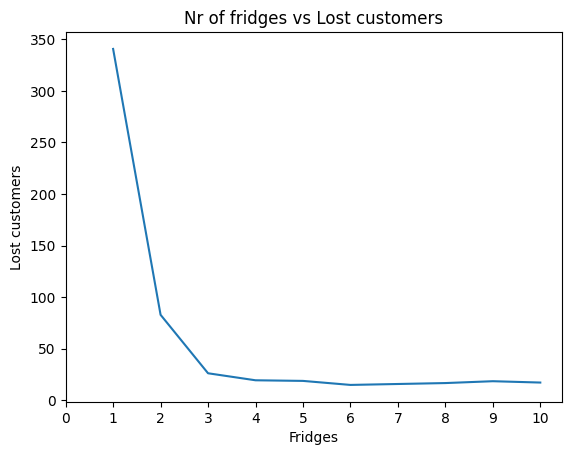

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), stats['customers_lost_experiment'])
plt.xticks(range(11))
plt.xlabel('Fridges')
plt.ylabel('Lost customers')
plt.title('Nr of fridges vs Lost customers')
plt.show()